In [54]:
import numpy as np
import tensorflow as tf
import os

In [55]:
import matplotlib.pyplot as plt
import _pickle
import time

In [56]:
# todo
# compare likelihoods
# test with less popular features
# use different priors
# multiclass logistic regression significance tests
# fit mixture of gaussian vs gaussian
# check if weight activity killed
# tansfer learning for new class and robustness

In [57]:
file = open('true_class_saliency_mask_vanilla_temp1_10.pkl', "rb")
# file = open('mean_diff_saliency_mask_vanilla_temp1.pkl', "rb")
true_saliencies = _pickle.load(file) 
file = open('mean.pkl', "rb")
gaussian_means = _pickle.load(file) 
file = open('covariance.pkl', "rb")
gaussian_covariances = _pickle.load(file)

with open('turker_prob.pkl', "rb") as handle:
    turkers = _pickle.load(handle) 

with open('test_set_17_227.pkl', "rb") as handle:
    test_set = _pickle.load(handle) 
    
# with open('turker_count.pkl', "rb") as handle:
#     turker_count= _pickle.load(handle) 

In [60]:
with open('new turker count.pkl', 'wb') as handle:
    _pickle.dump(turker_count, handle)

In [38]:
true_saliencies['Alec Baldwin'].shape

(15, 227, 227)

In [39]:
actor_true_saliencies = {}

for actor in true_saliencies:
    actor_saliency = np.mean(true_saliencies[actor], axis=0)
    actor_true_saliencies[actor] = actor_saliency

In [40]:
male_actors = ['Daniel Radcliffe', 'Gerard Butler', 'Michael Vartan', 'Alec Baldwin', 'Steve Carell',\
                    'Bill Hader', 'Fran Drescher', 'Matt Damon', 'Nicolas Cage']
female_actors = ['Cheryl Hines', 'Selena Gomez', 'Angie Harmon', 'Lorraine Bracco', 'Kristin Chenoweth',\
                      'America Ferrera', 'Anne Hathaway', 'Jennifer Aniston']
gender ={}
for actor in male_actors:
    gender[actor] = 'male'
for actor in female_actors:
    gender[actor] = 'female' 

In [41]:
# creating turker count per actor
features = ['beard', 'eye brows', 'eyes', 'hairline', 'lips', 'moustache', 'nose']
actor_stats = {}
for actor in test_set:
    actor_stats[actor] = {}
    for feature in features:
        actor_stats[actor][feature] = 0  
    for stats in turker_count[actor]:
        for feature in features:
            try:
                 actor_stats[actor][feature] += stats[feature]
            except:
                continue

actor_stats_normalized = {}
for actor in actor_stats:
    actor_stats_normalized[actor] = {}
    total_count = sum(actor_stats[actor].values())
    for feature in features:
        actor_stats_normalized[actor][feature] = actor_stats[actor][feature]/total_count

ZeroDivisionError: division by zero

In [42]:
# creating turker coiunt per actor
features = ['beard', 'eye brows', 'eyes', 'hairline', 'lips', 'moustache', 'nose']
# features = ['eye brows', 'eyes', 'lips', 'nose']
actor_stats = {}
for actor in test_set:
    actor_stats[actor] = {}
    for feature in features:
        actor_stats[actor][feature] = 0  
#     for stats in turker_count[actor]:
#         for feature in features:
#             try:
#                  actor_stats[actor][feature] += stats[feature]
#             except:
#                 continue
                
    stats = turker_count[actor]
    for feature in features:
        try:
             actor_stats[actor][feature] += stats[feature]
        except:
            continue

actor_stats_normalized = {}
for actor in actor_stats:
    actor_stats_normalized[actor] = {}
    total_count = sum(actor_stats[actor].values())
    for feature in features:
        actor_stats_normalized[actor][feature] = actor_stats[actor][feature]/total_count

In [43]:
actor_stats_normalized

{'Alec Baldwin': {'beard': 0.014627659574468085,
  'eye brows': 0.125,
  'eyes': 0.3523936170212766,
  'hairline': 0.061170212765957445,
  'lips': 0.21808510638297873,
  'moustache': 0.014627659574468085,
  'nose': 0.21409574468085107},
 'America Ferrera': {'beard': 0.0014388489208633094,
  'eye brows': 0.1223021582733813,
  'eyes': 0.22158273381294963,
  'hairline': 0.0460431654676259,
  'lips': 0.37410071942446044,
  'moustache': 0.010071942446043165,
  'nose': 0.22446043165467625},
 'Angie Harmon': {'beard': 0.011347517730496455,
  'eye brows': 0.1773049645390071,
  'eyes': 0.29219858156028367,
  'hairline': 0.03829787234042553,
  'lips': 0.3049645390070922,
  'moustache': 0.01276595744680851,
  'nose': 0.16312056737588654},
 'Anne Hathaway': {'beard': 0.0050568900126422255,
  'eye brows': 0.11378002528445007,
  'eyes': 0.32364096080910243,
  'hairline': 0.05309734513274336,
  'lips': 0.3944374209860936,
  'moustache': 0.0025284450063211127,
  'nose': 0.10745891276864729},
 'Bill Ha

In [44]:
average_turker_stats = {}
for feature in features:
    all_stats = [actor_stats_normalized[actor][feature] for actor in test_set.keys()]
    average_turker_stats[feature] = sum(all_stats)/len(all_stats)

In [45]:
average_turker_stats

{'beard': 0.03216859821327217,
 'eye brows': 0.12120223923716929,
 'eyes': 0.3113148326189036,
 'hairline': 0.07158751768452926,
 'lips': 0.2622714555752302,
 'moustache': 0.0210607611492483,
 'nose': 0.18039459552164716}

In [46]:
turker_deviations = {}
for actor in actor_stats_normalized:
    turker_deviations[actor]={}
    for feature in features:
        turker_deviations[actor][feature] = actor_stats_normalized[actor][feature]/average_turker_stats[feature]
        

In [47]:
turker_deviations

{'Alec Baldwin': {'beard': 0.4547185885281437,
  'eye brows': 1.0313340808448204,
  'eyes': 1.131952544813885,
  'hairline': 0.8544815457287034,
  'lips': 0.8315243681576434,
  'moustache': 0.6945456278055827,
  'nose': 1.186819062188367},
 'America Ferrera': {'beard': 0.04472836868190504,
  'eye brows': 1.0090750719057235,
  'eyes': 0.7117641390514804,
  'hairline': 0.6431730971665787,
  'lips': 1.426387475541169,
  'moustache': 0.47823259447594335,
  'nose': 1.2442747023856446},
 'Angie Harmon': {'beard': 0.35275138988849936,
  'eye brows': 1.4628852210564827,
  'eyes': 0.9385951164041673,
  'hairline': 0.5349797503692751,
  'lips': 1.162782043277355,
  'moustache': 0.6061489115394176,
  'nose': 0.9042430950006606},
 'Anne Hathaway': {'beard': 0.1571995764041669,
  'eye brows': 0.9387617423619098,
  'eyes': 1.0395937709954473,
  'hairline': 0.7417123382700865,
  'lips': 1.5039281347678066,
  'moustache': 0.12005477809672412,
  'nose': 0.5956880939692694},
 'Bill Hader': {'beard': 0.3

In [48]:
-

In [49]:
# avg_intensity_ratios = {}
# for feature in features:
#     feature_intensity_ratios = [predictions[actor][feature] for actor in sorted(test_set.keys())] 
#     avg_likelihood[feature] = sum(feature_likelihoods)/len(feature_likelihoods)
    
# for actor in predictions:
#     for feature in predictions[actor]:
#         predictions[actor][feature] /= avg_likelihood[feature]

In [50]:
def score(feature, rectangles, saliency_map):
    intensity_ratio_sum = 0
    for rec in rectangles[feature]:
        highlight = saliency_map[rec[2]:rec[3], rec[0]:rec[1]]
        area = (rec[3]-rec[2])*(rec[1]-rec[0])
        intensity_ratio = (np.sum(highlight))/np.sum(saliency_map)
        intensity_ratio_sum += intensity_ratio
    return intensity_ratio_sum/len(rectangles[feature])

In [51]:
scores = {}
deviations = {}
for actor in test_set.keys():
    scores[actor] = {}
    deviations[actor] = {}
    for feature in features:
        scores[actor][feature] = score(feature, mc_rectangle_samples, actor_true_saliencies[actor])

for feature in features:
    feature_scores = [scores[actor][feature] for actor in test_set.keys()]
    avg_feature_score = sum(feature_scores)/len(feature_scores)
    for actor in test_set.keys():
        deviations[actor][feature] = scores[actor][feature]/avg_feature_score

In [52]:
deviations

{'Alec Baldwin': {'beard': 0.81263264381469069,
  'eye brows': 0.89119836146318021,
  'eyes': 0.90215171811704042,
  'hairline': 1.3905684991343343,
  'lips': 0.87828472928837786,
  'moustache': 0.86342750745653163,
  'nose': 0.96925381223665308},
 'America Ferrera': {'beard': 1.2670052394759157,
  'eye brows': 0.66216251432244955,
  'eyes': 0.66929738918351256,
  'hairline': 0.49730425228139508,
  'lips': 1.4825203291083959,
  'moustache': 1.5390788241156652,
  'nose': 1.6069656235369596},
 'Angie Harmon': {'beard': 0.94115417360021325,
  'eye brows': 1.1609198946678843,
  'eyes': 1.1306522724724386,
  'hairline': 0.66030531587135943,
  'lips': 1.0704698458807052,
  'moustache': 1.0248382360384152,
  'nose': 1.0803166711273822},
 'Anne Hathaway': {'beard': 1.4821897729615572,
  'eye brows': 0.90780653728797434,
  'eyes': 0.89820331486311789,
  'hairline': 0.74058355153276278,
  'lips': 1.7457342950026964,
  'moustache': 1.7079737591824566,
  'nose': 1.0979616398505865},
 'Bill Hader':

beard


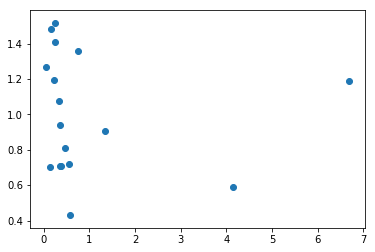

(-0.078987398979761259, 0.76315693243007887)
eye brows


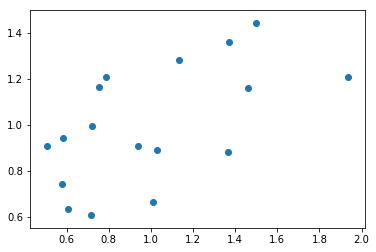

(0.57950667566516634, 0.014766922293215952)
eyes


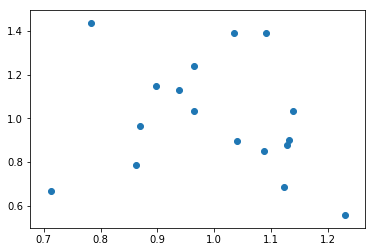

(-0.21607211961311654, 0.40488079866041016)
hairline


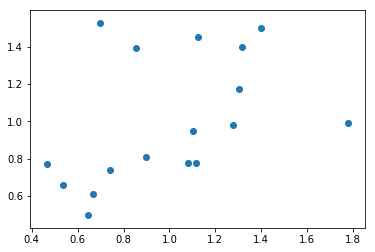

(0.42991578520173851, 0.084997798547311737)
lips


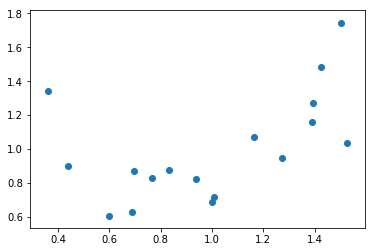

(0.51700116335726809, 0.033573982877226148)
moustache


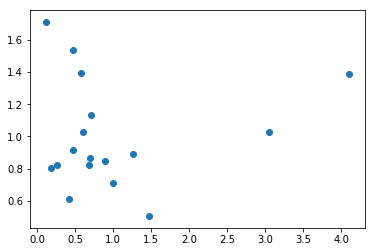

(0.099565548379911023, 0.70379910741666962)
nose


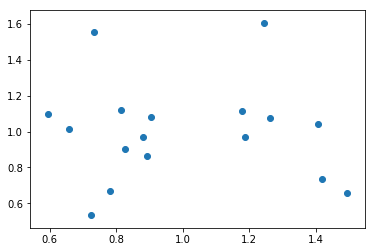

(-0.050720713307292754, 0.84670749040883497)


In [53]:
from scipy.stats import pearsonr
for feature in features:
    print(feature)
    turker_dev = np.array([turker_deviations[actor][feature] for actor in sorted(test_set.keys())])
    bp_dev = np.array([deviations[actor][feature] for actor in sorted(test_set.keys())])
    plt.scatter(turker_dev, bp_dev)
    plt.show()
    print(pearsonr(turker_dev, bp_dev))

In [35]:
for actor in sorted(test_set.keys()):
    print(actor)
    turker_dev = np.array([turker_deviations[actor][feature] for feature in features])
    bp_dev = np.array([deviations[actor][feature] for feature in features])
    print(pearsonr(turker_dev, bp_dev))

Alec Baldwin
(0.03525357578444429, 0.94018885421186271)
America Ferrera
(0.40834434357515104, 0.36309342878927864)
Angie Harmon
(0.59812818576727533, 0.15600850867655552)
Anne Hathaway
(-0.17336493382819851, 0.71008939017573236)
Bill Hader
(-0.27477995279867412, 0.55092837340826917)
Cheryl Hines
(0.16976090115954412, 0.71593964240612906)
Daniel Radcliffe
(0.70341991658490377, 0.077817021610498971)
Fran Drescher
(0.038941033450798551, 0.93394176048086064)
Gerard Butler
(0.23850752699701563, 0.60651472223417646)
Jennifer Aniston
(0.72604563480778739, 0.064676087258477413)
Kristin Chenoweth
(-0.10337909720100659, 0.82543450323993206)
Lorraine Bracco
(0.25433015882394006, 0.58206324520766273)
Matt Damon
(0.84755142636244063, 0.016026537730649864)
Michael Vartan
(0.62589128580593467, 0.13269687467156938)
Nicolas Cage
(0.37507274603173335, 0.40708347350106189)
Selena Gomez
(0.17741396573352322, 0.70353027619734576)
Steve Carell
(-0.3939558486378506, 0.38186745266003924)


In [39]:
def likelihood(deviations):    
    probs = {}
    for actor in test_set.keys():
        probs[actor] = {}
        sum_deviations = np.sum(np.array(list(deviations[actor].values())))
        for feature in features:
            probs[actor][feature] = deviations[actor][feature]/sum_deviations
    return probs

In [40]:
predictions = likelihood(deviations)

In [41]:
def posterior(rectangles, saliency_map, test_subject):
    scores = {}
    prior = create_individual_prior(test_subject)
    for feature in features:
#         intensity_ratio_sum = 0
#         for rec in rectangles[feature]:
#             highlight = saliency_map[rec[2]:rec[3], rec[0]:rec[1]]
#             area = (rec[3]-rec[2])*(rec[1]-rec[0])
#             intensity_ratio = (np.sum(highlight)/area)/np.sum(saliency_map)/(227**2)
#             intensity_ratio_sum += intensity_ratio
#         scores[feature] = prior[feature]*intensity_ratio_sum/len(rectangles[feature])
        scores[feature] = prior[feature]*deviations[test_subject][feature]
    sum_scores = np.sum(np.array(list(scores.values())))
    probs = {}
    
    for feature in sorted(scores.keys()):
        probs[feature] = scores[feature]/sum_scores
    
    return probs

In [42]:
posterior_predictions = {}
for actor in sorted(test_set.keys()):
    saliency_map = actor_true_saliencies[actor]
    probs = posterior(mc_rectangle_samples, saliency_map, actor)
    posterior_predictions[actor]=probs

In [19]:
# main problems are with turker data
# maybe imbalanced, also tend to label similar feature
# maybe should try new set of actors who have very distinct features to do anchoring
# people choocse what seems to get highlighted in that image, but not what is salient about the person
# probaly better to frame questionas as what is salient about this individual

In [43]:
import operator

actors = sorted(test_set.keys())

f, axes = plt.subplots(17, 4, figsize=(60,170))

for i in range(len(actors)):
    actor = actors[i]
    ax = axes[i]

    ax[0].set_title(actor)
    ax[0].axis('off')
    ax[0].imshow(actor_true_saliencies[actor])
        
    prediction = posterior_predictions[actor]
    turker_data = actor_stats_normalized[actor]
    sorted_turker_data = sorted(turker_data.items(), key=operator.itemgetter(1))
    sorted_turker_data.reverse()
    
    X = np.arange(len(turker_data))
    ax[1].set_ylim([0, 0.7])
    ax[1].bar(X, [prediction[key[0]] for key in sorted_turker_data],\
           width=0.2, color='b', align='center', label='Posterior Prediction')
    ax[1].bar(X-0.2, [turker_data[key[0]] for key in sorted_turker_data],\
           width=0.2, color='g', align='center', label='Turkers')
    ax[1].legend()
    ax[1].set_xticks(X)
    ax[1].set_xticklabels([key[0] for key in sorted_turker_data])
    ax[1].set_title('turkers vs posterior', fontsize=17)
    
    
    prediction = create_individual_prior(actor)
    X = np.arange(len(turker_data))
    ax[2].set_ylim([0, 0.7])
    ax[2].bar(X, [prediction[key[0]] for key in sorted_turker_data],\
           width=0.2, color='b', align='center', label='Prior Prediction')
    ax[2].bar(X-0.2, [turker_data[key[0]] for key in sorted_turker_data],\
           width=0.2, color='g', align='center', label='Turkers')
    ax[2].legend()
    ax[2].set_xticks(X)
    ax[2].set_xticklabels([key[0] for key in sorted_turker_data])
    ax[2].set_title('turkers vs prior', fontsize=17)
    
    prediction = predictions[actor]
    X = np.arange(len(turker_data))
    ax[3].set_ylim([0, 0.7])
    ax[3].bar(X, [prediction[key[0]] for key in sorted_turker_data],\
           width=0.2, color='b', align='center', label='Backprop Prediction')
    ax[3].bar(X-0.2, [turker_data[key[0]] for key in sorted_turker_data],\
           width=0.2, color='g', align='center', label='Turkers')
    ax[3].legend()
    ax[3].set_xticks(X)
    ax[3].set_xticklabels([key[0] for key in sorted_turker_data])
    ax[3].set_title('turkers vs backprop', fontsize=17)

    print(actor)
    
    
plt.savefig('genderless_robust_predictions_size_feature_normalized.png')
plt.close()

Alec Baldwin
America Ferrera
Angie Harmon
Anne Hathaway
Bill Hader
Cheryl Hines
Daniel Radcliffe
Fran Drescher
Gerard Butler
Jennifer Aniston
Kristin Chenoweth
Lorraine Bracco
Matt Damon
Michael Vartan
Nicolas Cage
Selena Gomez
Steve Carell


In [44]:
from scipy.stats import spearmanr
cors = []
pvals = []
for actor in sorted(test_set.keys()):
    print(actor)
    turker_data = actor_stats[actor]
    sorted_turker_data = sorted(turker_data.items(), key=operator.itemgetter(1))
    prediction = posterior_predictions[actor]
    predicted = np.array([prediction[key[0]] for key in sorted_turker_data])
    turker = np.array([turker_data[key[0]] for key in sorted_turker_data])
    cor, pval = spearmanr(predicted, turker) 
    cors.append(cor)
    pvals.append(pval)
    print(spearmanr(predicted, turker))
print('correlation')
print(np.mean(np.array(cors)))    
print('pvalue')
print(np.mean(np.array(pvals)))

Alec Baldwin
SpearmanrResult(correlation=0.92857142857142883, pvalue=0.0025194724037946874)
America Ferrera
SpearmanrResult(correlation=0.85714285714285732, pvalue=0.01369732661532562)
Angie Harmon
SpearmanrResult(correlation=0.8928571428571429, pvalue=0.0068071874089353918)
Anne Hathaway
SpearmanrResult(correlation=0.95499371045729253, pvalue=0.00080553533630175773)
Bill Hader
SpearmanrResult(correlation=0.92857142857142883, pvalue=0.0025194724037946874)
Cheryl Hines
SpearmanrResult(correlation=0.92857142857142883, pvalue=0.0025194724037946874)
Daniel Radcliffe
SpearmanrResult(correlation=0.85714285714285732, pvalue=0.01369732661532562)
Fran Drescher
SpearmanrResult(correlation=0.82142857142857151, pvalue=0.023448808345691505)
Gerard Butler
SpearmanrResult(correlation=0.32142857142857151, pvalue=0.4820720382996776)
Jennifer Aniston
SpearmanrResult(correlation=0.92857142857142883, pvalue=0.0025194724037946874)
Kristin Chenoweth
SpearmanrResult(correlation=0.92857142857142883, pvalue=0.

In [45]:
from scipy.stats import spearmanr
cors = []
pvals = []
for actor in sorted(test_set.keys()):
    print(actor)
    turker_data = actor_stats[actor]
    sorted_turker_data = sorted(turker_data.items(), key=operator.itemgetter(1))
    prediction = create_individual_prior(actor)
    predicted = np.array([prediction[key[0]] for key in sorted_turker_data])
    turker = np.array([turker_data[key[0]] for key in sorted_turker_data])
    cor, pval = spearmanr(predicted, turker) 
    cors.append(cor)
    pvals.append(pval)
    print(spearmanr(predicted, turker))
print('correlation')
print(np.mean(np.array(cors)))    
print('pvalue')
print(np.mean(np.array(pvals)))

Alec Baldwin
SpearmanrResult(correlation=0.96428571428571452, pvalue=0.00045414916919416892)
America Ferrera
SpearmanrResult(correlation=0.92857142857142883, pvalue=0.0025194724037946874)
Angie Harmon
SpearmanrResult(correlation=0.8928571428571429, pvalue=0.0068071874089353918)
Anne Hathaway
SpearmanrResult(correlation=0.9189562119494703, pvalue=0.0034366261562175319)
Bill Hader
SpearmanrResult(correlation=0.92857142857142883, pvalue=0.0025194724037946874)
Cheryl Hines
SpearmanrResult(correlation=0.92857142857142883, pvalue=0.0025194724037946874)
Daniel Radcliffe
SpearmanrResult(correlation=0.8928571428571429, pvalue=0.0068071874089353918)
Fran Drescher
SpearmanrResult(correlation=0.8928571428571429, pvalue=0.0068071874089353918)
Gerard Butler
SpearmanrResult(correlation=0.42857142857142866, pvalue=0.33736831108582399)
Jennifer Aniston
SpearmanrResult(correlation=0.8928571428571429, pvalue=0.0068071874089353918)
Kristin Chenoweth
SpearmanrResult(correlation=0.96428571428571452, pvalue=

In [46]:
from scipy.stats import spearmanr
cors = []
pvals = []
for actor in sorted(test_set.keys()):
    print(actor)
    turker_data = actor_stats[actor]
    sorted_turker_data = sorted(turker_data.items(), key=operator.itemgetter(1))
    prediction = predictions[actor]
    predicted = np.array([prediction[key[0]] for key in sorted_turker_data])
    turker = np.array([turker_data[key[0]] for key in sorted_turker_data])
    cor, pval = spearmanr(predicted, turker) 
    cors.append(cor)
    pvals.append(pval)
    print(spearmanr(predicted, turker))
print('correlation')
print(np.mean(np.array(cors)))    
print('pvalue')
print(np.mean(np.array(pvals)))

Alec Baldwin
SpearmanrResult(correlation=0.071428571428571438, pvalue=0.87904819314815408)
America Ferrera
SpearmanrResult(correlation=0.035714285714285719, pvalue=0.93940820547128556)
Angie Harmon
SpearmanrResult(correlation=0.75000000000000022, pvalue=0.052181400457057762)
Anne Hathaway
SpearmanrResult(correlation=-0.018018749253911181, pvalue=0.96941538680319872)
Bill Hader
SpearmanrResult(correlation=0.5, pvalue=0.25316999510032273)
Cheryl Hines
SpearmanrResult(correlation=0.32142857142857151, pvalue=0.4820720382996776)
Daniel Radcliffe
SpearmanrResult(correlation=0.42857142857142866, pvalue=0.33736831108582399)
Fran Drescher
SpearmanrResult(correlation=0.035714285714285719, pvalue=0.93940820547128556)
Gerard Butler
SpearmanrResult(correlation=0.071428571428571438, pvalue=0.87904819314815408)
Jennifer Aniston
SpearmanrResult(correlation=-0.32142857142857151, pvalue=0.4820720382996776)
Kristin Chenoweth
SpearmanrResult(correlation=-0.5, pvalue=0.25316999510032273)
Lorraine Bracco
Sp

In [12]:
# rank actors by prominence of feature
for feature in features:
    print(feature)
    data = [(actor, turker_deviations[actor][feature]) for actor in test_set.keys()]
    sorted_data = sorted(data, key=lambda tup: tup[1])
    sorted_data.reverse()
    clean_sorted_data = [stat[0] for stat in sorted_data]
    print(clean_sorted_data)

eye brows


NameError: name 'turker_deviations' is not defined

In [43]:
# rank actors by prominence of feature
for feature in features:
    print(feature)
    data = [(actor, deviations[actor][feature]) for actor in test_set.keys()]
    sorted_data = sorted(data, key=lambda tup: tup[1])
    sorted_data.reverse()
    clean_sorted_data = [stat[0] for stat in sorted_data]
    print(clean_sorted_data)

eye brows
['Steve Carell', 'Fran Drescher', 'Nicolas Cage', 'Daniel Radcliffe', 'Matt Damon', 'Lorraine Bracco', 'Angie Harmon', 'Kristin Chenoweth', 'Michael Vartan', 'Anne Hathaway', 'Cheryl Hines', 'Alec Baldwin', 'Bill Hader', 'Selena Gomez', 'America Ferrera', 'Gerard Butler', 'Jennifer Aniston']
eyes
['Steve Carell', 'Daniel Radcliffe', 'Nicolas Cage', 'Matt Damon', 'Fran Drescher', 'Angie Harmon', 'Cheryl Hines', 'Bill Hader', 'Lorraine Bracco', 'Alec Baldwin', 'Anne Hathaway', 'Kristin Chenoweth', 'Selena Gomez', 'Michael Vartan', 'Gerard Butler', 'America Ferrera', 'Jennifer Aniston']
lips
['Anne Hathaway', 'America Ferrera', 'Gerard Butler', 'Fran Drescher', 'Selena Gomez', 'Angie Harmon', 'Cheryl Hines', 'Kristin Chenoweth', 'Michael Vartan', 'Alec Baldwin', 'Nicolas Cage', 'Bill Hader', 'Jennifer Aniston', 'Matt Damon', 'Lorraine Bracco', 'Steve Carell', 'Daniel Radcliffe']
nose
['America Ferrera', 'Selena Gomez', 'Gerard Butler', 'Anne Hathaway', 'Matt Damon', 'Angie Harmo